<a href="https://colab.research.google.com/github/Tenzin-Yangzom-6839/CSCN8000-Class-Notebooks/blob/main/Synthetic_Data_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BACKLOG** :


# Strategic decision
### **AI for Volunteering matching. ( a recommendation system to match the perfect profile of the volunteers )**




1. CREATING SYNTHETIC USER-PROFILES AND SCRAPING VOLUNTEER JOB POSTINGS

Data Collection and Preparation:

A dataset containing PDFs of live resumes from a job portal was made available via a web link.
I extracted information from these PDF resumes and meticulously organized the data into a structured CSV file.

Job Descriptions:

To complete the puzzle, I collected job descriptions from various companies, sourced from Kaggle and provided in CSV format through a data link.

Synthetic Data generated for the user profile (candidate)

Why Synthetic ?
- Privacy
- Product Testing
- Training ML Model

In [20]:
!git clone https://github.com/gretelai/gdpr-helpers.git

Cloning into 'gdpr-helpers'...
remote: Enumerating objects: 293, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 293 (delta 149), reused 263 (delta 126), pack-reused 0
Receiving objects: 100% (293/293), 1.23 MiB | 13.66 MiB/s, done.
Resolving deltas: 100% (149/149), done.


Installing all the requirements

In [21]:
!cd gdpr-helpers; pip install -Uqq .

  Preparing metadata (setup.py) ... done


In [4]:
import os
if not os.getcwd().endswith('gdpr-helpers'):  # doing validation
  os.chdir('gdpr-helpers')

In [5]:
import glob
from gdpr_helpers import Anonymizer

Taking what kind of data we will be exploring

In [22]:
search_patterns = "data/User.csv"

## Workflow setup on Gretel
1. Classify : Setup a policy to find and label sensitive data such as PII, Credentials, etc
2. Transform: Learns how to define the policy to label and then transform a data with RE, data shifting, etc
3. Synthetics: Generate synthetic data

In [23]:
am = Anonymizer(
    project_name = "Volunteer-Matching",
    run_mode = "cloud",
    transforms_config = "src/config/transforms_config.yaml",
    synthetics_config = "src/config/synthetics_config.yaml",
    endpoint = "https://api.gretel.cloud"
)

Found cached Gretel credentials
Using endpoint https://api.gretel.cloud
Logged in as tenzinyangzom2222@gmail.com ✅
Follow along with model training at: https://console.gretel.ai/proj_2Wgevbk9GAzFZu7pbxBsthQyWzz


In [24]:
for dataset_path in glob.glob(search_patterns):
  am.anonymize(dataset_path=dataset_path)

Anonymizing 'data/User.csv'


Model creation complete!: : 13it [00:19,  1.49s/it]
Transform - Job completed: : 22it [00:32,  1.49s/it]




Named Entity Recognition
Processing time: 3.703 seconds
Samples: 100 records
Columns: 15 columns

Entities detected
| column_name       |   count |   approx_distinct_count |   missing_count | entities_detected    |
|:------------------|--------:|------------------------:|----------------:|:---------------------|
| FirstName         |     100 |                      93 |               0 | person_name          |
| MiddleName        |      52 |                      15 |              48 |                      |
| LastName          |     100 |                      84 |               0 | person_name          |
| Suffix            |       0 |                       0 |             100 |                      |
| AddressLine1      |     100 |                     100 |               0 | location             |
| AddressLine2      |       2 |                       2 |              98 | location             |
| City              |     100 |                      61 |               0 | location      

Actgan - Job completed: : 200it [05:37,  1.69s/it, num_records=16519]


dict_keys(['left_rows', 'left_cols', 'right_rows', 'right_cols', 'fields', 'left_correlation', 'right_correlation', 'correlation_difference', 'memorized_lines', 'mean_absolute_error', 'average_divergence', 'left_pca', 'right_pca', 'synthetic_data_quality_score', 'field_correlation_stability', 'principal_component_stability', 'field_distribution_stability', 'privacy_protection_level', 'model_id', 'project_name', 'model_name', 'model_type', 'fatal_error', 'summary', 'total_time_seconds', 'total_billed_seconds', 'job_status', 'job_type'])


Synthesis finished.
Lines memorized: 0

Model training time: 321.102 seconds

Job status: completed

Job type: actgan

Privacy report
|                        | value    |
|:-----------------------|:---------|
| outlier_filter         | Medium   |
| similarity_filter      | Medium   |
| overfitting_protection | Disabled |
| differential_privacy   | Disabled |

Accuracy report
| field                         |   value |
|:------------------------------|

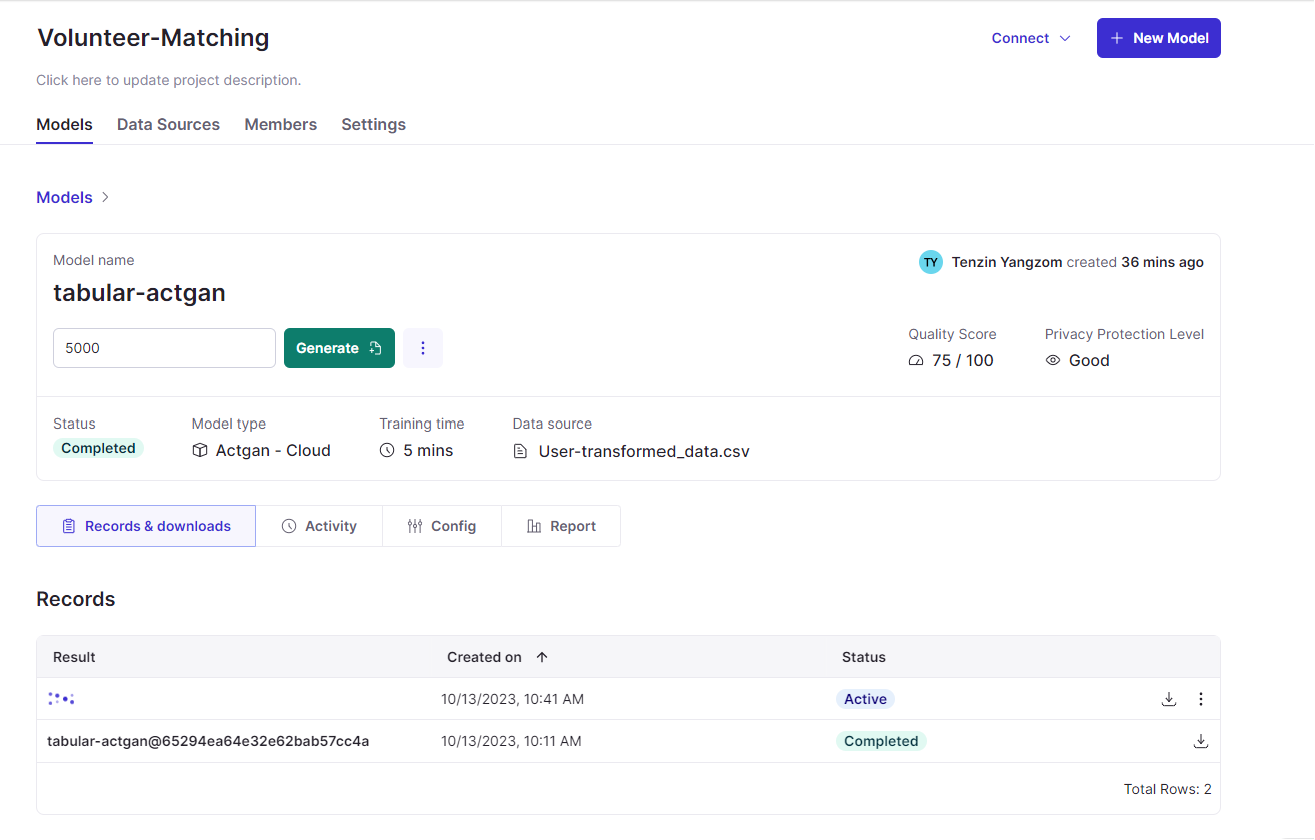

In [25]:
import pandas as pd

In [27]:
user_data = pd.read_csv("artifacts/User-synthetic_data.csv")
user_data.head()

,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender
0,Chelsey,Joel,Adams,NaN,373 Williams Grove Apt. 994,5717 Aaron Ports,Ballard,cb4b0d4f,ad185a6f,94015,768.922.3802x547,1963-06-30,Bachelors,Professional,F
1,Kelsey,Anthony,Figueroa,NaN,299 Lindsey Street Suite 426,5717 Aaron Ports,Oakland,cb4b0d4f,854372dc,92118,(870)065-7644,1949-08-28,Bachelors,Management,M
2,Sandra,Crystal,Williams,NaN,1601 Barajas Junctions Apt. 137,5717 Aaron Ports,Bremerton,ba643b7a,854372dc,98312,001-506-943-4252,1947-10-31,High School,Professional,M
3,Andrea,Joshua,Anderson,NaN,527 Diaz Street,5717 Aaron Ports,Lavender Bay,6c57e798,854372dc,2500,+1-637-047-5966x19155,1969-06-08,Partial College,Management,M
4,Miguel,Deborah,Henderson,NaN,0753 Reed Mall,5717 Aaron Ports,Cheltenham,35f4a147,d64eafd6,75005,+1-782-046-3289x426,1948-05-05,Bachelors,Professional,M


**Web Scraping on Volunteer Job Details**



**Volunteer Waterloo Region**

Volunteer Jobs From : https://volunteerwr.ca/Listings.php?ListType=Volunteer_Positions&MenuItemID=325

In [76]:
import requests
from bs4 import BeautifulSoup
import csv

In [79]:
url = 'https://volunteerwr.ca/Listings.php?ListType=Volunteer_Positions&MenuItemID=325'

In [83]:
# Send an HTTP GET request to the URL
response = requests.get(url)

In [84]:
soup = BeautifulSoup(response.text, 'html')

In [87]:
# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

requests.get(url)

<Response [200]>

In [91]:
# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Initialize a CSV file
    with open("volunteer_jobs.csv", "w", newline="") as csv_file:
        writer = csv.writer(csv_file)

        # Write headers to the CSV file
        writer.writerow(["Job Title", "Description"])

        # Find and extract job postings
        job_listings = soup.find_all("div", class_="MainList")
        for job in job_listings:
            title = job.find("div", class_="cell1").get_text()
            description = job.find("div", class_="cell2").get_text()
            writer.writerow([title, description])

else:
    print("Failed to retrieve the webpage")



In [92]:
job = pd.read_csv('volunteer_jobs.csv')

In [93]:
job.head()

,Job Title,Description
0,Fundraising Coordinator,Program/Special Event: Community Engagement
1,Manager of Client Services,Program/Special Event: Leadership Volunteer
2,One to one and small group activity leader,Program/Special Event: Friendly visitor to a g...
3,Ladies Group Lead,Program/Special Event: Friendly Visitor
4,One on One Visitor,Program/Special Event: Friendly Visitor


2. EXTRACT INSIGHTS FROM JOB POSTING FOR RECOMMENDATION
3. EXTRACT INSIGHTS FROM THE VOLUNTEER PROFILE FOR RECOMMENDATION
4. RECOMMEND THE CANDIDATES TO JOB POSTINGS BASED ON THE INSIGHTS
5. CREATE A GUI TO SHOW ALL CANDIDATE RECOMMENDED TO ALL JOBS